Coeficiente: 0.09366854522598557 
Intercepto: 70.28165896604418
Coeficiente de determinación modelo entrenado (R²) (entrenamiento): 0.762178927
Coeficiente de determinación modelo entrenado (R²) (prueba): 0.800668902

Coeficiente: 0.09276052452212805 
Intercepto: 70.49376046632901
Coeficiente de determinación modelo total (R²) (entrenamiento): 0.762095124
Coeficiente de determinación modelo total (R²) (prueba): 0.801176422


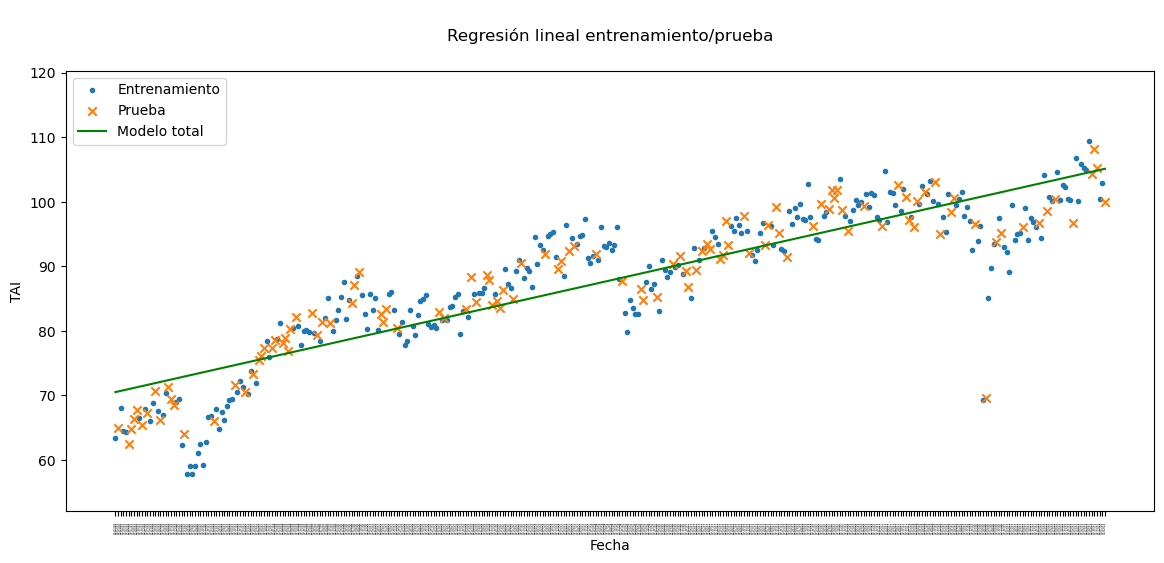





Coeficiente: [ 0.          0.21037883 -0.00030801] 
Intercepto: 62.745477923759154
Coeficiente de determinación modelo entrenado (R²) (entrenamiento): 0.838126089
Coeficiente de determinación modelo entrenado (R²) (prueba): 0.842247915

Coeficiente: [ 0.          0.198272   -0.00028287] 
Intercepto: 63.95204869230575
Coeficiente de determinación modelo total (R²) (entrenamiento): 0.836961550
Coeficiente de determinación modelo total (R²) (prueba): 0.849568734


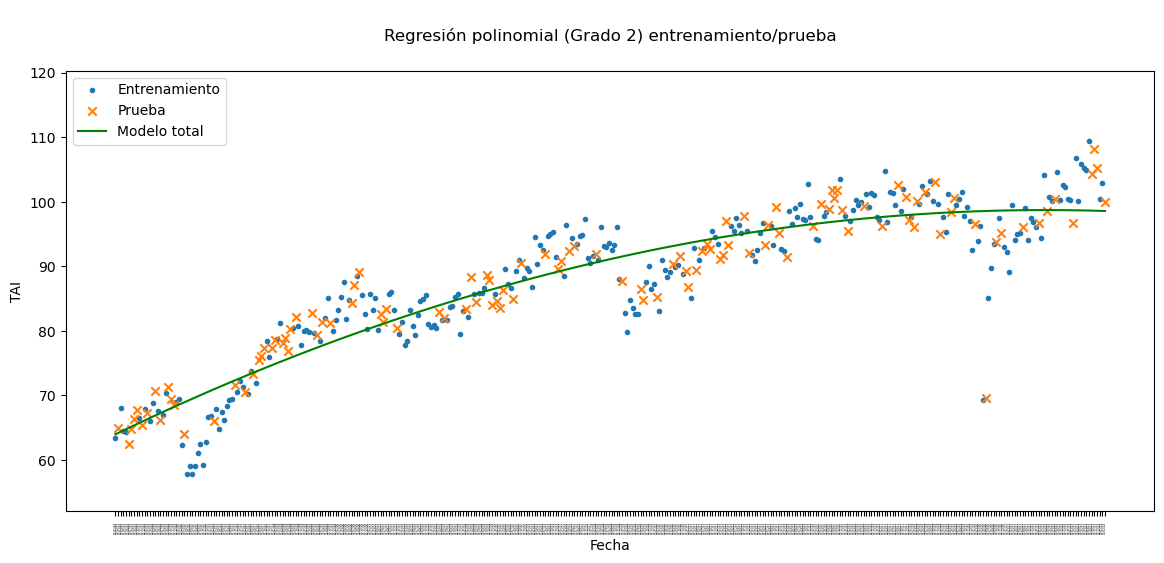

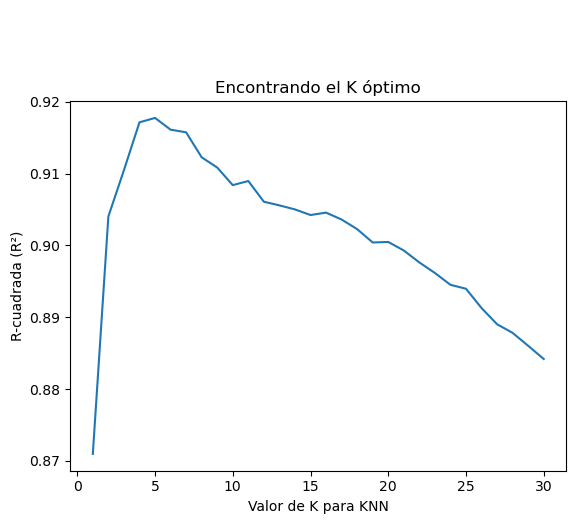

El valor óptima de k es: 5
Coeficiente de determinación (R²) (entrenamiento): 0.96
Coeficiente de determinación (R²) (prueba): 0.94

Coeficiente: 0.8730285947084788
Intercepto: -8.49135534912998e-17


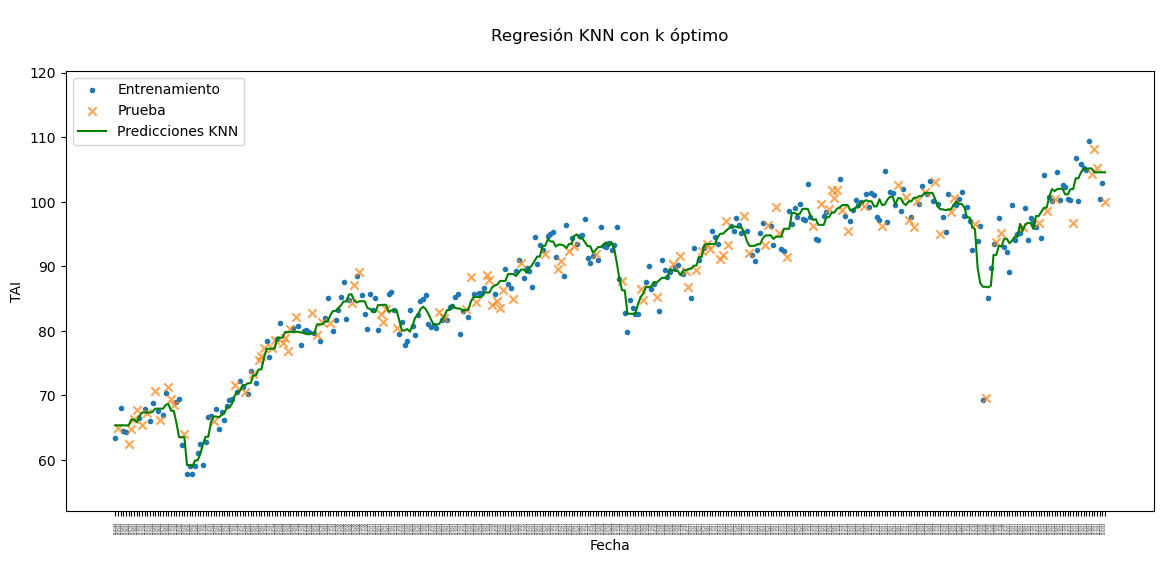





Coeficiente de determinación (R²) para max_depth = 2 (entrenamiento): 0.8672534783410406
Coeficiente de determinación (R²) para max_depth = 2 (prueba): 0.833937723146652

Coeficiente de determinación (R²) para max_depth = 5 (entrenamiento): 0.9582492698645353
Coeficiente de determinación (R²) para max_depth = 5 (prueba): 0.9267310421384165


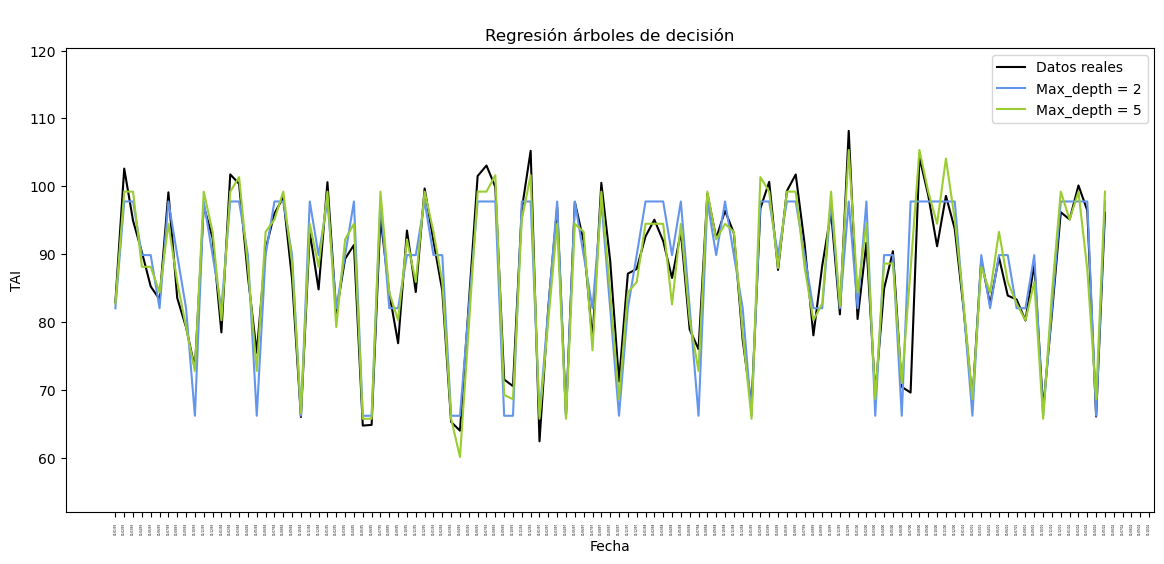

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numbers 
from tabulate import tabulate
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

def transform_variable(df: pd.DataFrame, x: str) -> pd.DataFrame:
    if isinstance(df[x].iloc[0], numbers.Number):
        return df[[x]]
    else:
        return pd.DataFrame(range(len(df[x])), columns = [x])

def lineal_regression_model(df: pd.DataFrame, x: str, y: str) -> None:
    fixed_x = transform_variable(df, x)
    X_train, X_test, y_train, y_test = train_test_split(fixed_x, df[y], test_size = 0.3, random_state = 0)

    ML = LinearRegression()
    trained_model = ML.fit(X_train, y_train)
    coef, intercept = trained_model.coef_[0], trained_model.intercept_
    print(f"Coeficiente: {coef} \nIntercepto: {intercept}", flush = True)

    print(f"Coeficiente de determinación modelo entrenado (R²) (entrenamiento): {trained_model.score(X_train, y_train):.9f}")
    print(f"Coeficiente de determinación modelo entrenado (R²) (prueba): {trained_model.score(X_test, y_test):.9f}")
    
    total_model = ML.fit(fixed_x, df[y])
    total_coef, total_intercept = total_model.coef_[0], total_model.intercept_
    print(f"\nCoeficiente: {total_coef} \nIntercepto: {total_intercept}", flush = True)

    print(f"Coeficiente de determinación modelo total (R²) (entrenamiento): {total_model.score(X_train, y_train):.9f}")
    print(f"Coeficiente de determinación modelo total (R²) (prueba): {total_model.score(X_test, y_test):.9f}")

    fig, ax = plt.subplots(figsize = (12, 6))
    y_min, y_max = df[y].min(), df[y].max()
    ax.set_ylim([y_min - (0.1 * abs(y_min)), y_max + (0.1 * abs(y_max))])

    plt.title(f"\nRegresión lineal entrenamiento/prueba", loc = "center", x = 0.5, y = 1.05)
    plt.scatter(X_train, y_train, marker = ".", label = "Entrenamiento")
    plt.scatter(X_test, y_test, marker = "x", label = "Prueba")
    plt.plot(df[x], total_model.predict(fixed_x), color = "green", label = "Modelo total")
    plt.xticks(rotation = 90, fontsize = 2)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.tight_layout(pad = 2)
    plt.savefig(f"img1/bplt_ML.png", dpi = 400)
    plt.show()

def polynomial_regression_model(df: pd.DataFrame, x: str, y: str, degree: int) -> None:
    fixed_x = transform_variable(df, x)
    polynomial_transformer = PolynomialFeatures(degree=degree)
    X_transformed = polynomial_transformer.fit_transform(fixed_x.values.reshape(-1, 1))
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, df[y], test_size = 0.3, random_state = 0)
    
    MP = LinearRegression()
    trained_model = MP.fit(X_train, y_train)
    coef, intercept = trained_model.coef_, trained_model.intercept_
    print(f"\n\n\n\nCoeficiente: {coef} \nIntercepto: {intercept}", flush = True)
    
    print(f"Coeficiente de determinación modelo entrenado (R²) (entrenamiento): {trained_model.score(X_train, y_train):.9f}")
    print(f"Coeficiente de determinación modelo entrenado (R²) (prueba): {trained_model.score(X_test, y_test):.9f}")
   
    total_model = MP.fit(X_transformed, df[y])
    total_coef, total_intercept = total_model.coef_, total_model.intercept_
    print(f"\nCoeficiente: {total_coef} \nIntercepto: {total_intercept}", flush = True)
    
    print(f"Coeficiente de determinación modelo total (R²) (entrenamiento): {total_model.score(X_train, y_train):.9f}")
    print(f"Coeficiente de determinación modelo total (R²) (prueba): {total_model.score(X_test, y_test):.9f}")
    
    fig, ax = plt.subplots(figsize = (12, 6))
    y_min, y_max = df[y].min(), df[y].max()
    ax.set_ylim([y_min - (0.1 * abs(y_min)), y_max + (0.1 * abs(y_max))])
    ax.set_xticks(range(len(df[x])))
    ax.set_xticklabels(df[x], rotation = 90, fontsize = 2)

    x_vals = np.linspace(fixed_x.min().values[0], fixed_x.max().values[0], 100).reshape(-1, 1)
    x_vals_transformed = polynomial_transformer.transform(x_vals)
    y_vals = total_model.predict(x_vals_transformed)
    
    plt.title(f"\nRegresión polinomial (Grado {degree}) entrenamiento/prueba", loc = "center", x = 0.5, y = 1.05)
    plt.scatter(fixed_x.iloc[X_train[:, 1].astype(int)], y_train, marker = ".", label = "Entrenamiento")
    plt.scatter(fixed_x.iloc[X_test[:, 1].astype(int)], y_test, marker = "x", label = "Prueba")
    plt.plot(x_vals, y_vals, color = "green", label = "Modelo total")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.tight_layout(pad = 2)
    plt.savefig(f"img1/bplt_MP.png", dpi = 400)
    plt.show()

def knn_model(df: pd.DataFrame, x: str, y: str) -> None:
    fixed_x = transform_variable(df, x)

    if len(fixed_x.shape) == 1:
       fixed_x = fixed_x.values.reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(fixed_x, df[y], test_size = 0.3, random_state = 0)

    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()
    
    k_range = range(1, 31)
    k_scores = []
    
    for k in k_range:
        knn = KNeighborsRegressor(n_neighbors = k)
        scores = cross_val_score(knn, X_train_scaled, y_train_scaled, cv = 10, scoring = "r2")
        k_scores.append(scores.mean())
    
    plt.plot(k_range, k_scores)
    plt.xlabel(f"Valor de K para KNN")
    plt.ylabel(f"R-cuadrada (R²)")
    plt.title(f"\n\n\n\nEncontrando el K óptimo")
    plt.show()
    
    optimal_k = k_range[k_scores.index(max(k_scores))]
    print(f"El valor óptima de k es: {optimal_k}")
    
    knn_optimal = KNeighborsRegressor(n_neighbors = optimal_k)
    knn_optimal.fit(X_train_scaled, y_train_scaled)
    y_train_pred_scaled = knn_optimal.predict(X_train_scaled)
    y_test_pred_scaled = knn_optimal.predict(X_test_scaled)
    
    y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1))
    y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1))
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f"Coeficiente de determinación (R²) (entrenamiento): {r2_train:.2f}")
    print(f"Coeficiente de determinación (R²) (prueba): {r2_test:.2f}")
    
    MKNN = LinearRegression()
    MKNN.fit(X_train_scaled, y_train_scaled)
    coeficiente = MKNN.coef_[0]
    intercepto = MKNN.intercept_
    
    print(f"\nCoeficiente: {coeficiente}")
    print(f"Intercepto: {intercepto}")

    fig, ax = plt.subplots(figsize = (12, 6))
    y_min, y_max = df[y].min(), df[y].max()
    ax.set_ylim([y_min - (0.1 * abs(y_min)), y_max + (0.1 * abs(y_max))])
    ax.set_xticks(range(len(df[x])))
    ax.set_xticklabels(df[x], rotation = 90, fontsize = 2)
    
    plt.title(f"\nRegresión KNN con k óptimo", loc = "center", x = 0.5, y = 1.05)
    plt.scatter(X_train, y_train, marker = ".", label = "Entrenamiento")
    plt.scatter(X_test, y_test,  marker = "x", alpha = 0.7, label = "Prueba")
    plt.plot(fixed_x, scaler_y.inverse_transform(knn_optimal.predict(scaler_X.transform(fixed_x)).reshape(-1, 1)), color = "green", label = "Predicciones KNN")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.tight_layout(pad = 2)
    plt.savefig(f"img1/bplt_MKNN.png", dpi = 400)
    plt.show()

def DTR_model(df: pd.DataFrame, x: str, y: str) -> None:
    fixed_x = transform_variable(df, x)
    X_train, X_test, y_train, y_test = train_test_split(fixed_x, df[y], test_size = 0.3, random_state = 0)
    
    regr_1 = DecisionTreeRegressor(max_depth = 2)
    regr_2 = DecisionTreeRegressor(max_depth = 5)
    regr_1.fit(X_train, y_train)
    regr_2.fit(X_train, y_train)
    
    y_pred_train_1 = regr_1.predict(X_train)
    y_pred_train_2 = regr_2.predict(X_train)
    y_pred_1 = regr_1.predict(X_test)
    y_pred_2 = regr_2.predict(X_test)
    
    r2_train_1 = r2_score(y_train, y_pred_train_1)
    r2_train_2 = r2_score(y_train, y_pred_train_2)
    r2_1 = r2_score(y_test, y_pred_1)
    r2_2 = r2_score(y_test, y_pred_2)
    
    print(f"\n\n\n\nCoeficiente de determinación (R²) para max_depth = 2 (entrenamiento): {r2_train_1}")
    print(f"Coeficiente de determinación (R²) para max_depth = 2 (prueba): {r2_1}")
    print(f"\nCoeficiente de determinación (R²) para max_depth = 5 (entrenamiento): {r2_train_2}")
    print(f"Coeficiente de determinación (R²) para max_depth = 5 (prueba): {r2_2}")
    
    fig, ax = plt.subplots(figsize = (12, 6))
    y_min, y_max = df[y].min(), df[y].max()
    ax.set_ylim([y_min - (0.1 * abs(y_min)), y_max + (0.1 * abs(y_max))])
    ax.set_xticks(range(len(df[x])))
    ax.set_xticklabels(df[x], rotation = 90, fontsize = 2)
    
    plt.plot(y_test.values, label = "Datos reales", color = "black")
    plt.plot(y_pred_1, label = "Max_depth = 2", color = "cornflowerblue")
    plt.plot(y_pred_2, label = "Max_depth = 5", color = "yellowgreen")
    plt.xlabel("Fecha")
    plt.ylabel("TAI")
    plt.title(f"\nRegresión árboles de decisión")
    plt.legend()
    plt.tight_layout(pad = 2)
    plt.savefig(f"img1/bplt_MDT.png", dpi = 400)
    plt.show()

df = pd.read_csv("csv/Proyecto.csv")
df_by_TAI = df[["Fecha", "TAI"]]
lineal_regression_model(df_by_TAI, "Fecha", "TAI")
polynomial_regression_model(df_by_TAI, "Fecha", "TAI", degree = 2)
knn_model(df_by_TAI, "Fecha", "TAI")
DTR_model(df_by_TAI, "Fecha", "TAI")

In [12]:
def cross_validation_scores(model, X, y, cv = 5):
    scores = cross_val_score(model, X, y, cv = cv, scoring = "r2")
    return scores.mean(), scores.std()

def evaluate_models(df, x, y):
    fixed_x = transform_variable(df, x)
    
    X_train, X_test, y_train, y_test = train_test_split(fixed_x, df[y], test_size = 0.3, random_state = 0)
    linear_model = LinearRegression()
    linear_cv_mean, linear_cv_std = cross_validation_scores(linear_model, fixed_x, df[y])
    
    polynomial_transformer = PolynomialFeatures(degree = 2)
    X_poly = polynomial_transformer.fit_transform(fixed_x.values.reshape(-1, 1))
    poly_model = LinearRegression()
    poly_cv_mean, poly_cv_std = cross_validation_scores(poly_model, X_poly, df[y])
    
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_scaled = scaler_X.fit_transform(fixed_x.values.reshape(-1, 1))
    y_scaled = scaler_y.fit_transform(df[y].values.reshape(-1, 1)).ravel()
    knn_model = KNeighborsRegressor(n_neighbors = 5)
    knn_cv_mean, knn_cv_std = cross_validation_scores(knn_model, X_scaled, y_scaled)
    
    dtr_model = DecisionTreeRegressor(max_depth = 5)
    dtr_cv_mean, dtr_cv_std = cross_validation_scores(dtr_model, fixed_x, df[y])
    
    print(f"Regresión lineal [Media: {linear_cv_mean:.3f}, Desv: {linear_cv_std:.3f}]")
    print(f"Regresión polinomial [Media: {poly_cv_mean:.3f}, Desv: {poly_cv_std:.3f}]")
    print(f"Regresión KNN [Media: {knn_cv_mean:.3f}, Desv: {knn_cv_std:.3f}]")
    print(f"Regresión árbol de decisión [Media: {dtr_cv_mean:.3f}, Desv: {dtr_cv_std:.3f}]")

evaluate_models(df_by_TAI, "Fecha", "TAI")

Regresión lineal [Media: -1.509, Desv: 0.449]
Regresión polinomial [Media: -0.350, Desv: 0.347]
Regresión KNN [Media: -1.137, Desv: 0.944]
Regresión árbol de decisión [Media: -0.774, Desv: 0.932]
